In [1]:
import pandas as pd
import pareto
import os
from itertools import chain
from matplotlib import pyplot as plt

In [2]:
# load solutions
sollist = []
solutions = []
for filename in os.listdir('data'):
    if filename.endswith('solution.csv'):
        sollist.append(filename[:-4])
        df_temp = pd.read_csv(f"data/{filename}", header=0)
        solutions.append(df_temp.values.tolist())
solutions = list(chain.from_iterable(solutions))
print(f"Loaded into list 'solutions': {', '.join(sollist)}")

Loaded into list 'solutions': SE_100_solution, SE_10_solution, SE_20_solution, SE_30_solution, SE_40_solution, SE_50_solution, SE_60_solution, SE_70_solution, SE_80_solution, SE_90_solution


In [5]:
nondominated = pareto.eps_sort([solutions], [0,1,2,3,4,5], [0.5, 0.05, 0.05, 0.05, 0.05, 0.001], maximize=[4])
df_nondom = pd.DataFrame(nondominated)
df_nondom.to_csv("output/refence_set_original.csv", index=False, header=False)

<AxesSubplot:>

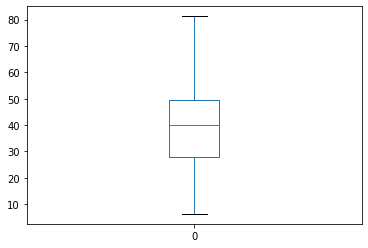

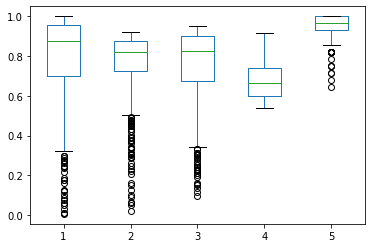

In [4]:
df_nondom = pd.DataFrame(nondominated)
df_nondom[[0,1,2,3,5]] = df_nondom[[0,1,2,3,5]] * -1
df_nondom[4] = 1 - df_nondom[4]
df_nondom.to_csv("output/refence_set_for_viz.csv", index=False, header=False)

df_nondom[0].plot.box()
df_nondom[[1,2,3,4,5]].plot.box()

# print(df_nondom.max())
# print(df_nondom.min())